In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
train = pd.read_csv("D:\\Mars Rover Manipal\\Project 4\\fashion-mnist_train.csv")
test = pd.read_csv("D:\\Mars Rover Manipal\\Project 4\\fashion-mnist_test.csv")

In [146]:
y_value=np.zeros((1,10))
for i in range (10):
    print("occurance of ",i,"=",np.count_nonzero(train['label']==i))
    y_value[0,i-1]= np.count_nonzero(train['label']==i)

occurance of  0 = 6000
occurance of  1 = 6000
occurance of  2 = 6000
occurance of  3 = 6000
occurance of  4 = 6000
occurance of  5 = 6000
occurance of  6 = 6000
occurance of  7 = 6000
occurance of  8 = 6000
occurance of  9 = 6000


<BarContainer object of 10 artists>

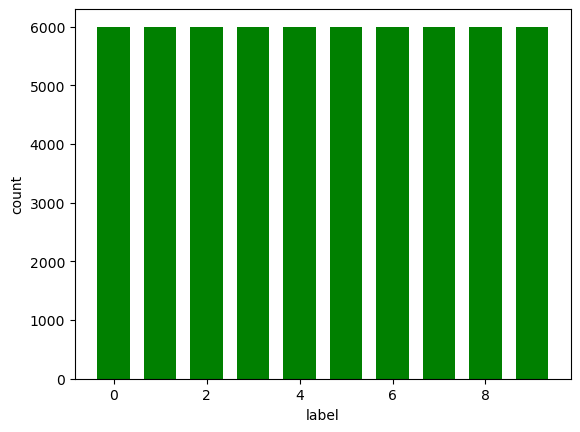

In [158]:
y_value=y_value.ravel()
x_value=[0,1,2,3,4,5,6,7,8,9]
plt.xlabel('label')
plt.ylabel('count')
plt.bar(x_value,y_value,0.7,color='g')

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [148]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [149]:
train=np.array(train)
test=np.array(test)

In [150]:
print(train.shape)
m,n = train.shape

data_train = train[0:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
X_train.shape

(60000, 785)


(784, 60000)

In [151]:
print(test.shape)
m,n = test.shape
np.random.shuffle(test)

data_dev = test[0:5000].T
Y_val = data_dev[0]
X_val = data_dev[1:n]
X_val = X_val / 255.
print(X_val.shape)

data_test = test[5000:m].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.
_,m_test = X_test.shape
X_test.shape

(10000, 785)
(784, 5000)


(784, 5000)

In [152]:
Y_test

array([9, 6, 0, ..., 7, 5, 5], dtype=int64)

In [153]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [154]:
def init_params():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(10, 128) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [155]:
def ReLU(Z):
    return np.maximum(Z, 0)

def sigmoid(Z):
    return 1/((1+np.exp(-Z))*(1+np.exp(-Z)))
              
def sigmoid_deriv(Z):
    return -np.exp(-Z)/((1+np.exp(-Z))*(1+np.exp(-Z)))

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [156]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):

    vdW1=np.zeros((128,784))
    vdW2=np.zeros((10, 128))
    vdb1=np.zeros((128, 1))
    vdb2=np.zeros((10, 1))
    
    sdW1=np.zeros((128,784))
    sdW2=np.zeros((10, 128))
    sdb1=np.zeros((128, 1))
    sdb2=np.zeros((10, 1))
    
    beta1=0.9
    beta2=0.999
    epsilon=10**-8
    
    vdW1 = (beta1*vdW1+(1-beta1)*dW1)/(1-beta1)
    vdW2 = (beta1*vdW2+(1-beta1)*dW2)/(1-beta1)
    vdb1 = (beta1*vdb1+(1-beta1)*db1)/(1-beta1)    
    vdb2 = (beta1*vdb2+(1-beta1)*db2)/(1-beta1)
    
    sdW1 = (beta2*sdW1+(1-beta2)*dW1*dW1)/(1-beta2)
    sdW2 = (beta2*sdW2+(1-beta2)*dW2*dW2)/(1-beta2)
    sdb1 = (beta2*sdb1+(1-beta2)*db1*db1)/(1-beta2)    
    sdb2 = (beta2*sdb2+(1-beta2)*db2*db2)/(1-beta2)

    W1 = W1 - (alpha * vdW1)/(np.sqrt(sdW1)+epsilon)
    b1 = b1 - (alpha * vdb1)/(np.sqrt(sdb1)+epsilon)   
    W2 = W2 - (alpha * vdW2)/(np.sqrt(sdW2)+epsilon)  
    b2 = b2 - (alpha * vdb2)/(np.sqrt(sdb2)+epsilon)    
    return W1, b1, W2, b2

In [157]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [142]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.005, 250)

Iteration:  0
[8 8 8 ... 8 8 8] [2 9 6 ... 8 8 7]
0.10128333333333334
Iteration:  10
[0 9 6 ... 0 8 7] [2 9 6 ... 8 8 7]
0.49443333333333334
Iteration:  20
[4 9 4 ... 4 8 7] [2 9 6 ... 8 8 7]
0.5527166666666666
Iteration:  30
[4 7 4 ... 4 8 7] [2 9 6 ... 8 8 7]
0.6007
Iteration:  40
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6279333333333333
Iteration:  50
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.64585
Iteration:  60
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6631166666666667
Iteration:  70
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6741166666666667
Iteration:  80
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6859
Iteration:  90
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6959
Iteration:  100
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.6944333333333333
Iteration:  110
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.7059166666666666
Iteration:  120
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.7133166666666667
Iteration:  130
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.7158666666666667
Iteration:  140
[4 7 4 ... 8 8 7] [2 9 6 ... 8 8 7]
0.73611666

In [143]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

val_predictions = make_predictions(X_val, W1, b1, W2, b2)
print("Val Accuracy", get_accuracy(val_predictions, Y_val))

test_predictions = make_predictions(X_test, W1, b1, W2, b2)
print("Test Accuracy",get_accuracy(test_predictions, Y_test))

[3 1 4 ... 4 2 3] [3 1 4 ... 4 8 4]
Val Accuracy 0.766
[1 0 4 ... 1 0 3] [1 0 6 ... 1 0 3]
Test Accuracy 0.7672
